<h2> Imports </h2>

In [19]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib import cm
from collections import Counter
sns.set()

<h2> Data </h2>

<h3> Q1 - 2. </h3>

In [10]:
df = pd.read_pickle(r".\dataset.pkl")

In [11]:
df.head()

actq      apq        atq       ceqq      cheq  \
date       ticker                                                      
2000-02-01 LLB        3.540    0.143      7.668      6.732     2.553   
2000-02-03 MYR      107.661   24.387    220.463    136.555     1.049   
2000-02-08 LZB      447.719   57.893    740.905    460.612    16.531   
           SJM      234.415   33.821    488.136    322.432    26.054   
2000-02-09 CSCO    7722.000  482.000  21391.000  16523.000  3968.000   

                      cogsq     csh12q    cshfdq     cshiq  cshopq  ...  \
date       ticker                                                   ...   
2000-02-01 LLB        0.458     6.3910     6.391     6.989     0.0  ...   
2000-02-03 MYR       36.883    25.5360    22.082    28.458     0.0  ...   
2000-02-08 LZB      274.525    52.2660    52.274    52.544     0.0  ...   
           SJM       91.172    28.8808    28.603    32.425     0.0  ...   
2000-02-09 CSCO    1422.000  3374.1250  3648.000  3445.000     0.0  ...   

                   sector_code_815.0  sector_code_817.0  sector_code_822.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_823.0  sector_code_825.0  sector_code_830.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_835.0  sector_code_840.0  sector_code_845.0  \
date       ticker                                                            
2000-02-01 LLB                     0                  0                  0   
2000-02-03 MYR                     0                  0                  0   
2000-02-08 LZB                     0                  0                  0   
           SJM                     0                  0                  0   
2000-02-09 CSCO                    0                  0                  0   

                   sector_code_850.0  
date       ticker                     
2000-02-01 LLB                     0  
2000-02-03 MYR                     0  
2000-02-08 LZB                     0  
           SJM                     0  
2000-02-09 CSCO                    0  

[5 rows x 731 columns]

<h3> Q3. </h3>

In [12]:
n = 1000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
data1 = pd.DataFrame({'x' : x, 'y' : y})
target = norm.pdf((x - 0.75) / 1) + norm.pdf((y - 0.75) / 0.01)\
         + norm.pdf((x - 0.25) / 0.1) + norm.pdf((y - 0.25) / 1) \
         + np.array(np.round(np.random.normal(-0.1,0.1, n), 2))

<h2> Helper Functions </h2>

In [13]:
def HW1_Q2_conditions(x):
    if x > 0.05:
        return 2
    elif x > 0.01:
        return 1
    elif x > -0.01:
        return 0
    elif x > -0.05:
        return -1
    else:
        return -2

In [37]:
def boxes(tree,data,labels, color_scheme = cm.prism_r, line_width = 10, scatter = True):

    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    def split(i):

        left = children_left[i]
        right = children_right[i]

        return (left,right)


    def parent(i):
        splits = enumerate([split(i) for i in range(n_nodes)])
        for a,b in splits:
            if (b[0] == i) or (b[1] == i):
                return a
            else: continue



    def box(i):

        (a,b),(c,d) = (0,0),(0,0)

        if i == 0:
            (a,b) = (0,0)
            (c,d) = (1,1)
        else:
            j = parent(i)
            t = threshold[j]
            (a,b),(c,d) = box(j)

            if feature[j] == 0:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (t,d)
                else:
                    (a,b) = (t,b)
                    (c,d) = (c,d)

            if feature[j] == 1:
                if i == split(j)[0]:
                    (a,b) = (a,b)
                    (c,d) = (c,t)
                else:
                    (a,b) = (a,t)
                    (c,d) = (c,d)

        return (a,b),(c,d)

    boxes = []
    for i in range(n_nodes):
        boxes.append(box(i))

    if scatter:
        fig, ax = plt.subplots(figsize = (10,10))
        ax.scatter(x, y, c = target);

        for i in range(1,n_nodes):

            j = parent(i)
            t = threshold[j]
            ((a,b),(c,d)) = boxes[j]
            if feature[j] == 0:
                ax.vlines(t, b, d, colors='k')
            else:
                ax.hlines(t,a,c,colors='k')

    leaves = [x for x in range(n_nodes) if split(x) == (-1,-1)]

    leaf_rects = []
    for leaf in leaves:
        ((a,b),(c,d)) = box(leaf)
        rect = Rectangle((a,b), c - a,d - b )
        leaf_rects.append(rect)


    facecolor = []
    for leaf in leaves:
        data_points_in_rect = []
        for i in range(len(data1)):
            p = data1.iloc[i]
            ((a,b),(c,d)) = boxes[leaf]
            if (p['x'] > a) and (p['x'] <= c) and (p['y'] > b) and (p['y'] <= d):
                data_points_in_rect.append(target[i])
        color = color_scheme( np.mean(data_points_in_rect))
        facecolor.append(color)

    pc = PatchCollection(leaf_rects, facecolor=facecolor, alpha=0.9,
                         edgecolor='k',linewidths = (line_width,))

    fig,ax = plt.subplots(figsize = (10,10))
    ax.add_collection(pc);

<h2> Q1. </h2>

In [15]:
df['HW1_Q1'] = df['pred_rel_return'].apply(lambda x: 1 if x > 0 else -1)

In [16]:
df[['HW1_Q1']].head()

HW1_Q1
date       ticker        
2000-02-01 LLB         -1
2000-02-03 MYR          1
2000-02-08 LZB          1
           SJM          1
2000-02-09 CSCO        -1

<h2> Q2. </h2>

In [17]:
df['HW1_Q2'] = df['pred_rel_return'].apply(HW1_Q2_conditions)

In [18]:
df[['HW1_Q2']].head()

HW1_Q2
date       ticker        
2000-02-01 LLB         -2
2000-02-03 MYR          2
2000-02-08 LZB          2
           SJM          2
2000-02-09 CSCO        -1

<h2> Q3. </h2>

In [27]:
tree_q3 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=40)
tree_q3.fit(data1, target)
None

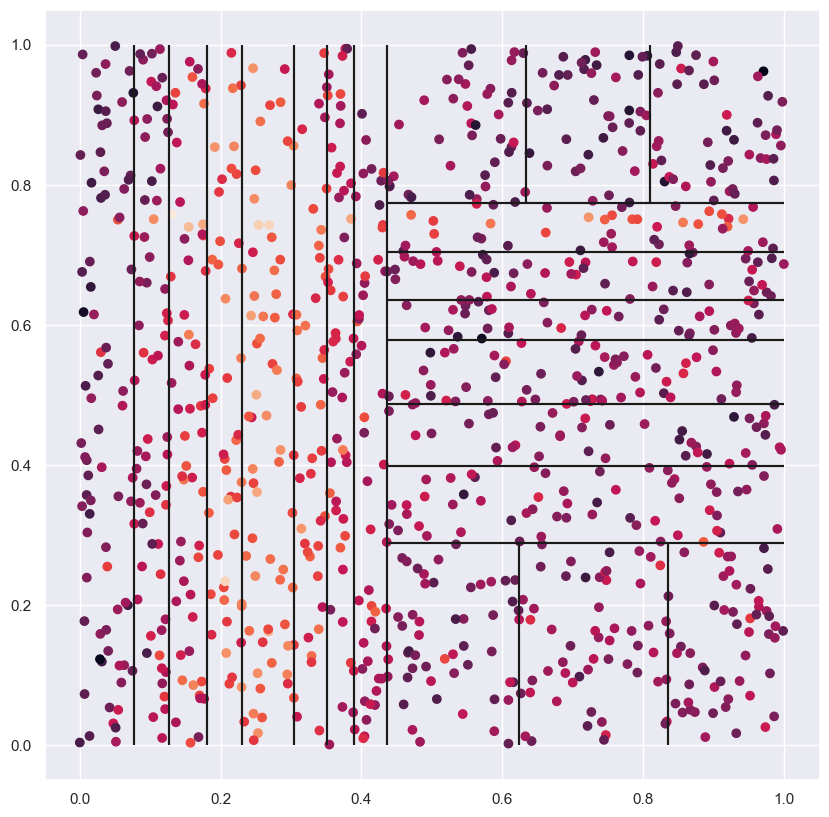

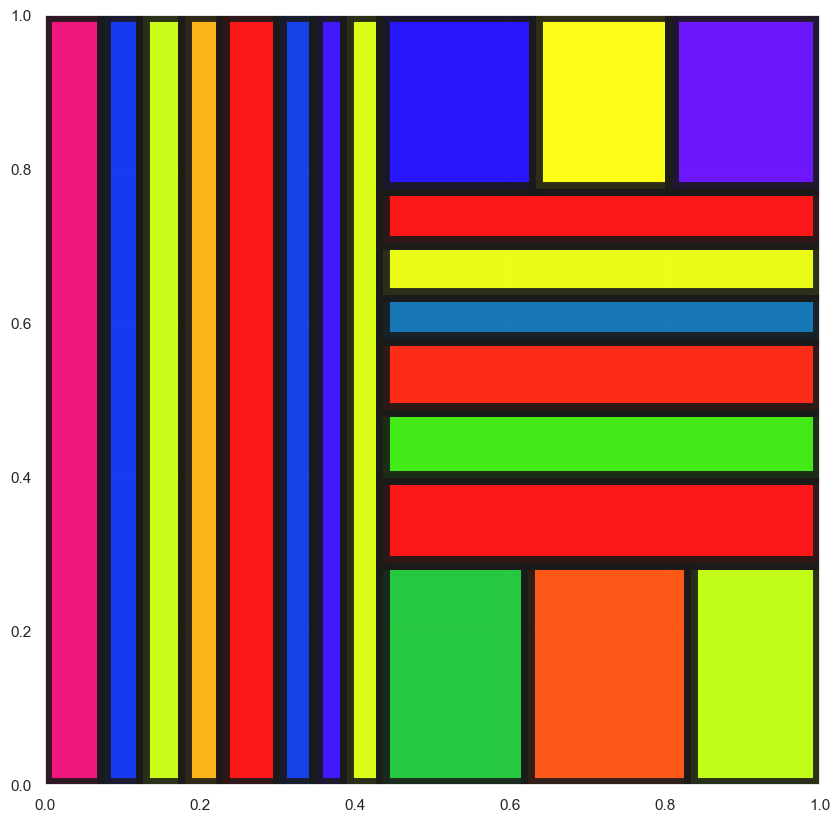

In [32]:
boxes(tree_q3, data1, target)

<h3> Experimenting with color schemes </h3>

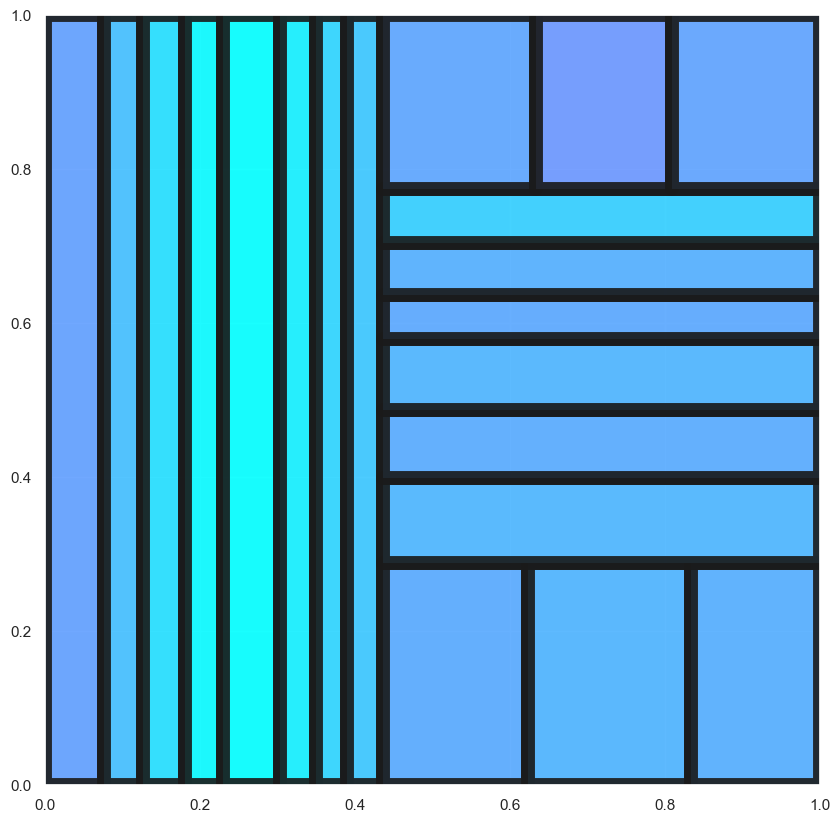

In [35]:
boxes(tree_q3, data1, target, color_scheme = cm.cool_r, scatter = False)

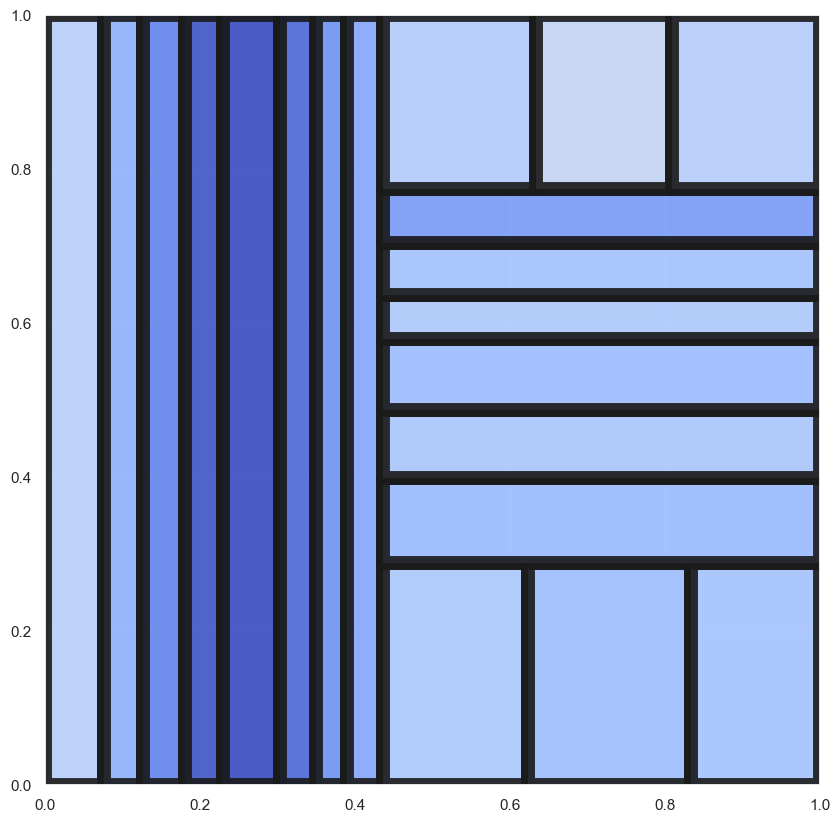

In [34]:
boxes(tree_q3, data1, target, color_scheme = cm.coolwarm_r, scatter = False)

<h3> Experimenting with Width (cm) </h3>

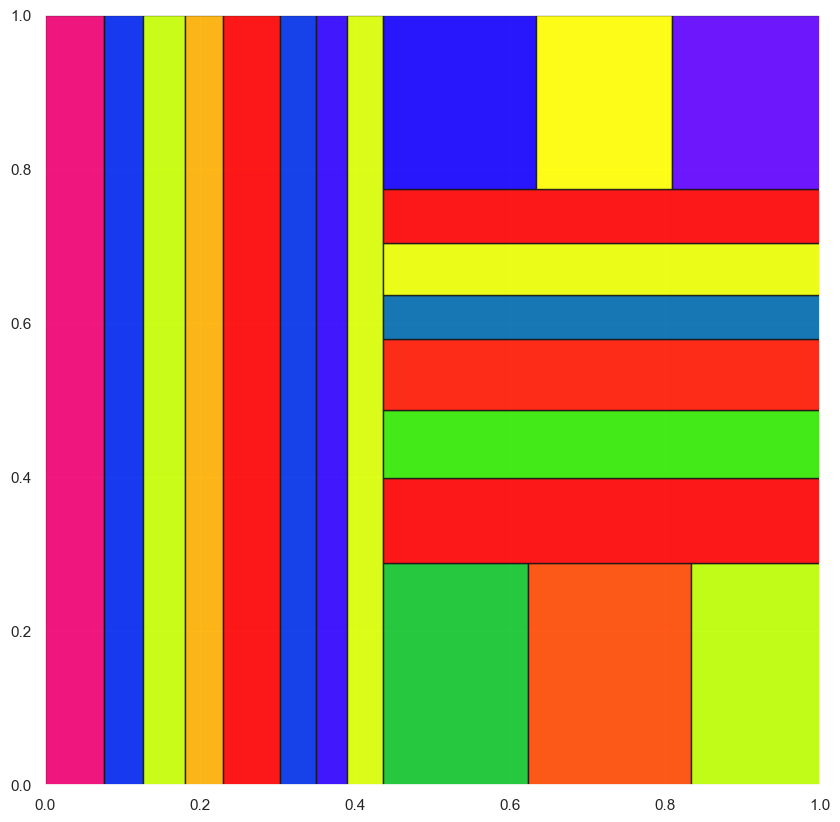

In [39]:
boxes(tree_q3, data1, target, line_width = 1, scatter = False)

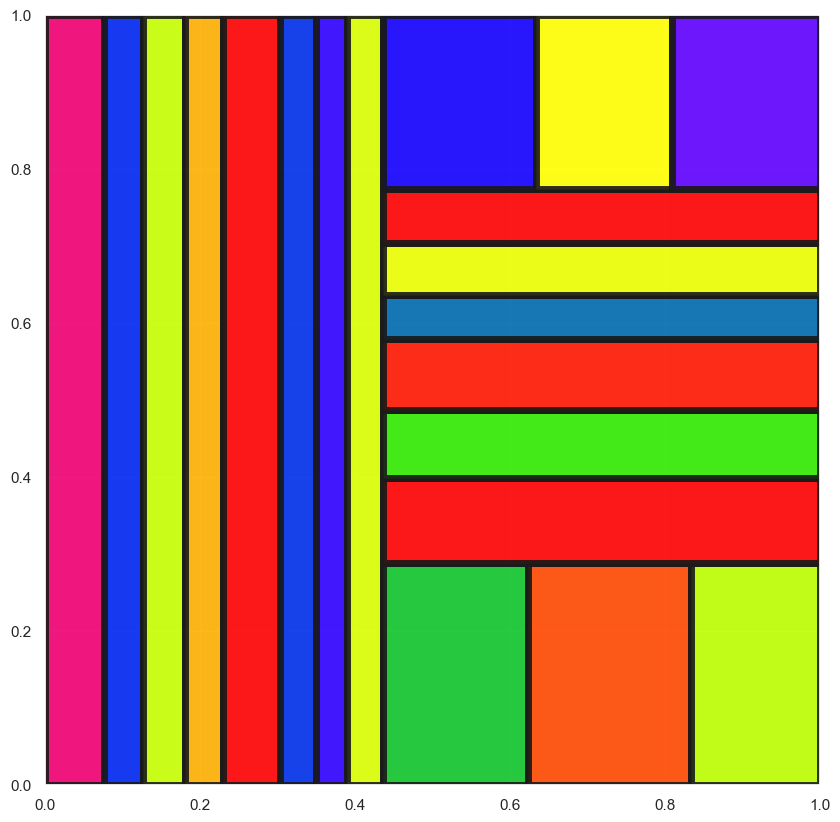

In [40]:
boxes(tree_q3, data1, target, line_width = 5, scatter = False)